<a href="https://colab.research.google.com/github/romenlaw/ML-playground/blob/main/nn_dl_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Universal Theorem
This is a graphical proof of the theorem, basically saying that a single layer NN can simulate any function to any accuracy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (3, 3)

def step(x, threshold=0.5):
  return 1 if x>threshold else 0

def sigmoid(x):
  return 1 / (1 + np.exp(-x))


## Single input

Single input (x) function like f(x) = 0.2 + 0.4x^2 + 0.3x sin(15x) + 0.05 cos(50x)

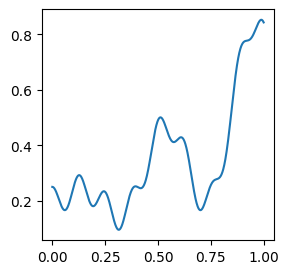

In [ ]:
x = np.linspace(0, 1, 1000)
f =  lambda x: 0.2 + 0.4 * x**2 + 0.3 * x * np.sin(15*x) + 0.05 * np.cos(50*x)
# plt.figure(figsize=(3,2))
plt.plot(x, f(x))

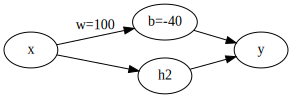

In [ ]:
import graphviz

dot = graphviz.Digraph(graph_attr={'rankdir': 'LR'})
dot.node('x')
dot.node('h1', label='b=-40')
dot.node('h2')
dot.node('y')
dot.edge('x', 'h1', label='w=100')
dot.edge('x', 'h2')
dot.edge('h1', 'y')
dot.edge('h2', 'y')
dot

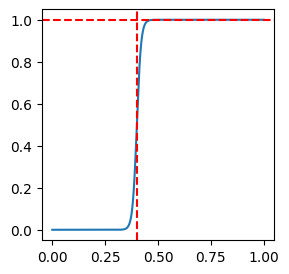

In [ ]:
h1 = lambda x: sigmoid(100 * x - 40)
h2 = lambda x: 0
y = lambda x: (h1(x) + h2(x))

plt.plot(x, y(x))
plt.axvline(x=0.4, color='r', linestyle='--')  # Vertical line at x=0.4
plt.axhline(y=1, color='r', linestyle='--')  # Vertical line at y=1

It will greatly simplify our lives to describe hidden neurons using just a single parameter, s,
which is the step position, s = −b/w.

Up to now we’ve been focusing on the output from just the top hidden neuron. Let’s take
a look at the behavior of the entire network. In particular, we’ll suppose the hidden neurons
are computing step functions parameterized by step points s1
(top neuron) and s2
(bottom
neuron). And they’ll have respective output weights w1 and w2
. Here’s the network:

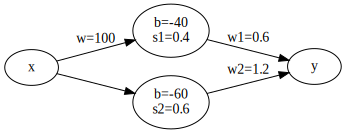

In [ ]:
dot = graphviz.Digraph(graph_attr={'rankdir': 'LR'})
dot.node('x')
dot.node('h1', label='b=-40\ns1=0.4')
dot.node('h2', label='b=-60\ns2=0.6')
dot.node('y')
dot.edge('x', 'h1', label='w=100')
dot.edge('x', 'h2')
dot.edge('h1', 'y', label='w1=0.6')
dot.edge('h2', 'y', label='w2=1.2')
dot

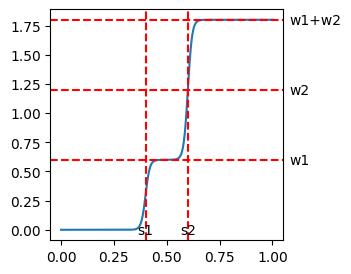

In [ ]:
w = 100.0
s1, s2 = .4, .6
w1, w2 = 0.6, 1.2

a1 = lambda x: sigmoid(w * x - s1 * w)
a2 = lambda x: sigmoid(w * x - s2 * w)
y = lambda x: (a1(x)*w1 + a2(x)*w2)

def plot_2():
  plt.plot(x, y(x))
  # vertical lines
  plt.axvline(x=s1, color='r', linestyle='--')
  plt.axvline(x=s2, color='r', linestyle='--')

  # horizontal lines
  plt.axhline(y=w1, color='r', linestyle='--')
  plt.axhline(y=w2, color='r', linestyle='--')
  plt.axhline(y=w1+w2, color='r', linestyle='--')

  plt.text(1.08, w1, 'w1', va='center', ha='left')
  plt.text(1.08, w2, 'w2', va='center', ha='left')
  plt.text(1.08, w1+w2, 'w1+w2', va='center', ha='left')
  ymax = max(w1+w2, w1, w2)
  plt.text(s1, 0, 's1', va='center', ha='center')
  plt.text(s2, 0, 's2', va='center', ha='center')
  plt.show()

plot_2()

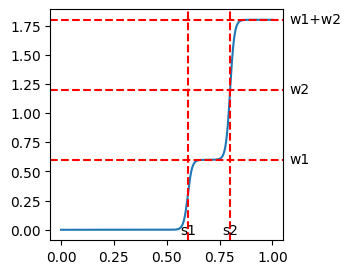

In [ ]:
s1, s2 = .6, .8
w1, w2 = 0.6, 1.2
plot_2()

Here, a1 and a2 are the outputs from the top and bottom hidden neurons, respectively.
These outputs are denoted with as because they’re often known as the neurons’ activations.

Try increasing and decreasing the step point s1 of the top hidden neuron. Get a feel
for how this changes the weighted output from the hidden layer. It’s particularly worth
understanding what happens when s1 goes past s2
. You’ll see that the graph changes shape
when this happens, since we have moved from a situation where the top hidden neuron
is the first to be activated to a situation where the bottom hidden neuron is the first to be
activated.
Similarly, try manipulating the step point s2 of the bottom hidden neuron, and get a feel
for how this changes the combined output from the hidden neurons.
Try increasing and decreasing each of the output weights. Notice how this rescales the
contribution from the respective hidden neurons. What happens when one of the weights is
zero?

Finally, try setting w1
to be 0.8 and w2
to be -0.8. You get a “bump” function, which
starts at point s1
, ends at point s2
, and has height 0.8. For instance, the weighted output
might look like this:

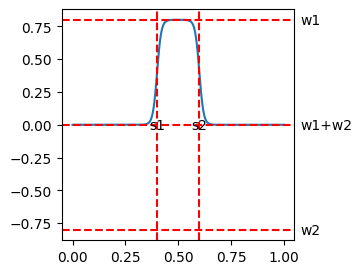

In [ ]:
s1, s2 = .4, .6
w1, w2 = 0.8, -0.8
plot_2()

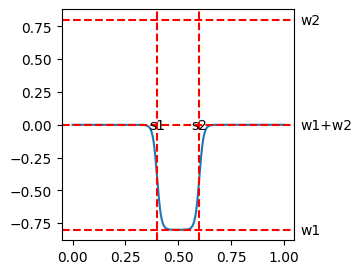

In [ ]:
s1, s2 = .4, .6
w1, w2 = -0.8, 0.8
plot_2()

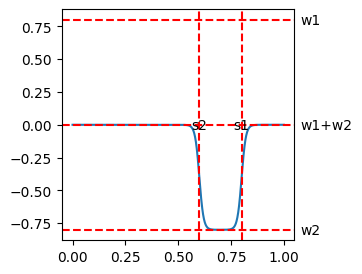

In [ ]:
s1, s2 = .8, .6
w1, w2 = 0.8, -0.8
plot_2()

Of course, we can rescale the bump to have any height at all. Let’s use a single parameter, h,
to denote the height. To reduce clutter I’ll also remove the “s1 = . . .” and “w1 = . . .” notations.

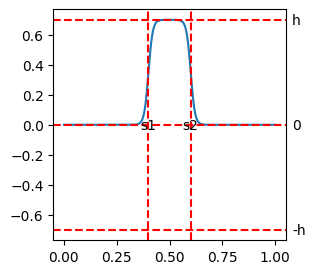

In [ ]:
s1, s2 = .4, .6
h=0.7
y = lambda x: (a1(x)*h - a2(x)*h)

def plot_3():
  plt.plot(x, y(x))
  # vertical lines
  plt.axvline(x=s1, color='r', linestyle='--')
  plt.axvline(x=s2, color='r', linestyle='--')

  # horizontal lines
  plt.axhline(y=h, color='r', linestyle='--')
  plt.axhline(y=-h, color='r', linestyle='--')
  plt.axhline(y=0, color='r', linestyle='--')

  plt.text(1.08, h, 'h', va='center', ha='left')
  plt.text(1.08, -h, '-h', va='center', ha='left')
  plt.text(1.08, 0, '0', va='center', ha='left')

  plt.text(s1, 0, 's1', va='center', ha='center')
  plt.text(s2, 0, 's2', va='center', ha='center')
  plt.show()

plot_3()

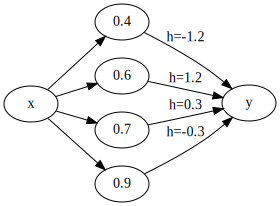

In [ ]:
dot = graphviz.Digraph(graph_attr={'rankdir': 'LR'})
dot.node('x')
dot.node('a1', label='0.4')
dot.node('a2', label='0.6')
dot.node('a3', label='0.7')
dot.node('a4', label='0.9')
dot.node('y')
dot.edge('x', 'a1')
dot.edge('x', 'a2')
dot.edge('x', 'a3')
dot.edge('x', 'a4')
dot.edge('a1', 'y', label='h=-1.2')
dot.edge('a2', 'y', label='h=1.2')
dot.edge('a3', 'y', label='h=0.3')
dot.edge('a4', 'y', label='h=-0.3')
dot

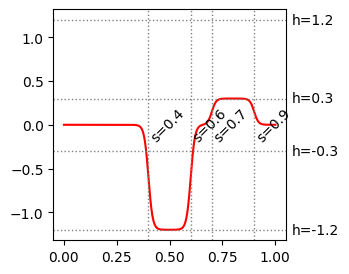

In [ ]:
ss = np.array([.4, .6, .7, .9])
hs = np.array([-1.2, 1.2, .3, -.3])

a = lambda x: sigmoid(w*(x - ss))
y = lambda xs, scale=1.0: [np.dot(a(x)*scale, hs) for x in xs]

def plot_4(scale=1.0):
  plt.plot(x, y(x, scale), color='r')

  for s in ss:
    plt.axvline(x=s, color='gray', linestyle=':', linewidth=1)
    plt.text(s, 0, f's={s}', va='center', ha='left', rotation=45)

  if scale==1.0:
    for h in hs:
      plt.axhline(y=h, color='gray', linestyle='dotted', linewidth=1)
      plt.text(1.08, h, f'h={h}', va='center', ha='left')

  plt.show()

plot_4()


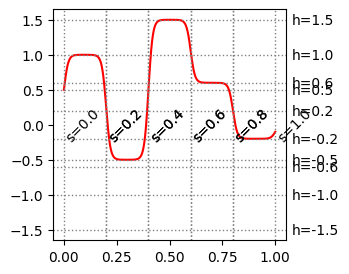

In [ ]:
ss = np.array([0.0, 0.2,
               0.2, 0.4,
               0.4, 0.6,
               0.6, 0.8,
               0.8, 1.0])
hs = np.array([1.0, -1.0,
               -.5, .5,
               1.5, -1.5,
               .6, -.6,
               -.2, .2])

plot_4()

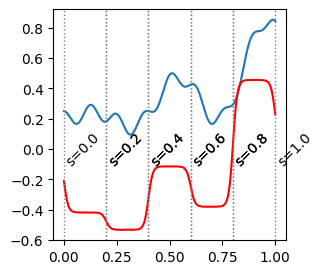

In [ ]:
ss = np.array([0.0, 0.2,
               0.2, 0.4,
               0.4, 0.6,
               0.6, 0.8,
               0.8, 1.0])
hs = np.array([-1.1, 1.1,
              -1.4, 1.4,
              -.3, .3,
              -1.0, 1.,
              1.2, -1.2])

plt.plot(x, f(x))
plot_4(scale=0.38)


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(50, input_dim=1, activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
x = np.linspace(0, 1, 1000)

model.fit(x, f(x), epochs=10000, verbose=0) # I ran this several times

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


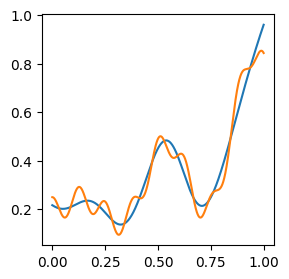

In [ ]:
plt.plot(x, model.predict(x))
plt.plot(x, f(x))

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(50, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
x = np.linspace(0, 1, 1000)

model.fit(x, f(x), epochs=10000, verbose=0)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


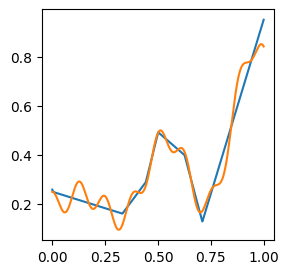

In [ ]:
plt.plot(x, model.predict(x))
plt.plot(x, f(x))

## 2 inputs

We’ll start by considering what happens when we have two inputs to a neuron:

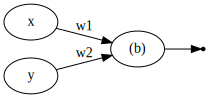

In [ ]:
dot = graphviz.Digraph()
dot = graphviz.Digraph(graph_attr={'rankdir': 'LR'})
dot.node('x')
dot.node('y')
dot.node('b', '(b)')
dot.node('out', '', shape='point')

dot.edge('x', 'b', label='w1')
dot.edge('y', 'b', label='w2')
dot.edge('b', 'out')
dot

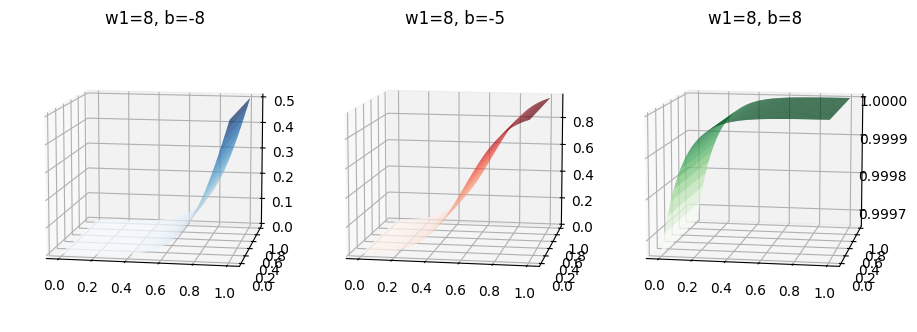

In [4]:
plt.rcParams['figure.figsize'] = (9, 5)

w1, w2, b = 8, 0, -8
x = np.linspace(0, 1, 1000)
y = np.linspace(0, 1, 1000)
X, Y = np.meshgrid(x, y)
f = lambda x, y: sigmoid(x * w1 + y * w2 + b)
Z = f(X, Y)

def plot_fig(fig, w, b, cmap):
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap=cmap)
    ax.set_title(f'w1={w}, b={b}')
    ax.view_init(elev=10, azim=-80)

fig = plt.figure()
fig1, fig2, fig3 = fig.subfigures(1, 3)

plot_fig(fig1, w1, b, cmap='Blues')

w1, b = 8, -5
Z = f(X, Y)
plot_fig(fig2, w1, b, cmap='Reds')

w1, b = 8, 8
Z = f(X, Y)
plot_fig(fig3, w1, b, cmap='Greens')

plt.tight_layout()
plt.show()